In [ ]:
import numpy as np
from scipy.stats import genextreme
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Tryingout

In [1]:
# GIC_extreme_value that over 100 ampare = [216.0, 215.0, 215.0, 215.0, 140.8, 213.0, 483.0, 108.8]
# 0-50 amp   1839 times
# 100-200 amp 2 times
# 200-300 amp 5 times
# 300-400 amp 0 times
# 400-500 amp 1 times

# Tryingout

In [ ]:
# filter GIC_extreme_value over 100
high_gic_values_df = df[df['GIC_extreme_value'] > 100]

high_gic_values_df.to_csv('high_gic_values_over_100.csv', index=False)


In [ ]:
df2 = pd.read_csv('/content/high_gic_values_over_100.csv')
high_gic_values = df2['GIC_extreme_value'].values
head = df2.head()
head

,GICDeviceID,SampleDateTime,GIC_extreme_value,Event,Year,Lat,Long,Unnamed: 7,Unnamed: 8
0,10434,6/22/2015 3:00:00 AM,216.0,20150622,2015,39.5,-75.1,NaN,NaN
1,10434,9/11/2015 3:00:00 AM,215.0,20150911,2015,39.5,-75.1,NaN,NaN
2,10434,9/19/2015 6:00:00 PM,215.0,20150919,2015,39.5,-75.1,NaN,NaN
3,10434,10/6/2015 6:00:00 PM,215.0,20151006,2015,39.5,-75.1,NaN,NaN
4,10063,10/8/2015 1:38:34 AM,140.8,20151006,2015,33.4,-112.5,NaN,NaN


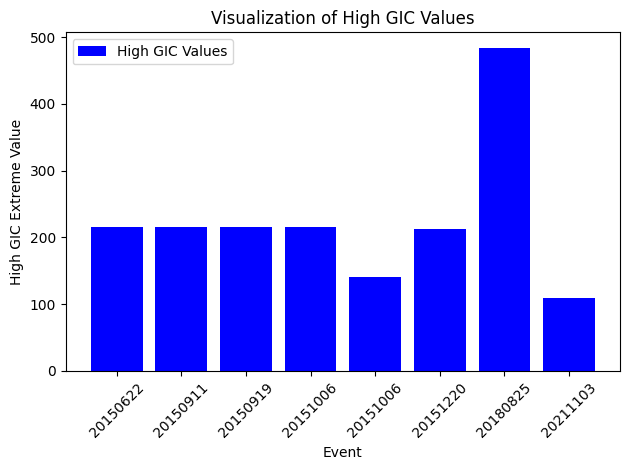

In [ ]:
import matplotlib.pyplot as plt


high_gic_values = [216.0, 215.0, 215.0, 215.0, 140.8, 213.0, 483.0, 108.8]

# high_event is the date list of high gic value
high_event = [20150622, 20150911, 20150919, 20151006, 20151006, 20151220, 20180825, 20211103]

event_labels = range(len(high_event))

# plot
plt.bar(event_labels, high_gic_values, color='blue', label='High GIC Values')

# adding labels
plt.xlabel('Event')
plt.ylabel('High GIC Extreme Value')
plt.title('Visualization of High GIC Values')
plt.xticks(event_labels, high_event, rotation=45)

plt.legend()

plt.tight_layout()
plt.show()


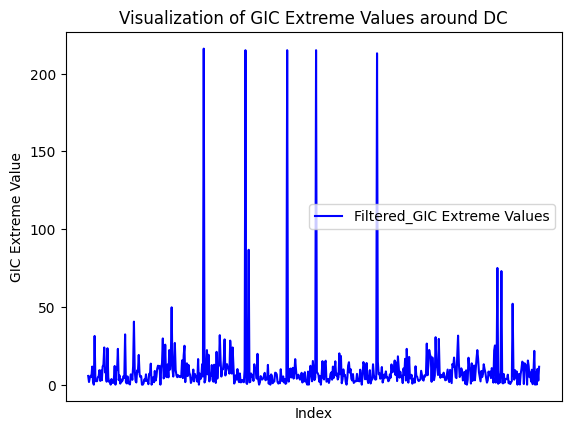

In [ ]:
# 37.2332976975099, -79.10568836091659
# 42.315168310818855, -72.53779273019907

filtered_df = df[(df[' Lat'] >= 37.233) & (df[' Lat'] <= 42.315) & (df['Long'] >= -79.105) & (df['Long'] <= -72.537)]
filtered_gic_values = filtered_df['GIC_extreme_value'].values

years = range(2013, 2013 + len(filtered_gic_values))
plt.xticks(ticks=range(2013, 2023), labels=range(2013, 2023))

plt.plot(filtered_gic_values, 'b-', label='Filtered_GIC Extreme Values')


plt.xlabel('Index')
plt.ylabel('GIC Extreme Value')
plt.title('Visualization of GIC Extreme Values around DC')


plt.legend()
plt.show()

## Visualize NERC GIC_extreme_value

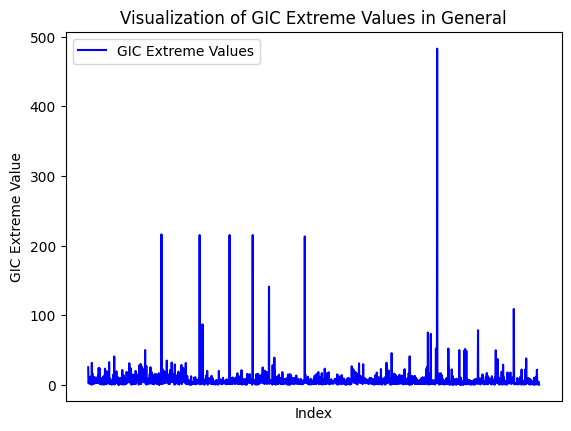

In [ ]:
years = range(2013, 2013 + len(gic_values))
plt.xticks(ticks=range(2013, 2023), labels=range(2013, 2023))

plt.plot(gic_values, 'b-', label='GIC Extreme Values')


plt.xlabel('Index')
plt.ylabel('GIC Extreme Value')
plt.title('Visualization of GIC Extreme Values in General')

plt.legend()
plt.show()


## GEV Generalized Extreme Value for 100 years estimation

In [ ]:
from scipy.stats import genextreme
import numpy as np
data = np.array([gic_values])
# Fit the GEV distribution
c, loc, scale = genextreme.fit(data)
print(f"Shape parameter: {c}")
print(f"Location parameter: {loc}")
print(f"Scale parameter: {scale}")


Shape parameter: -0.5219729825501171
Location parameter: 2.5282458411466884
Scale parameter: 2.4983184640039617


In [ ]:
# Estimate the 100-year return level
return_period = 100
return_level = genextreme.ppf(1 - 1/return_period, c, loc, scale)
print(f"The 100-year return level is: {return_level}")


The 100-year return level is: 50.56305909826591


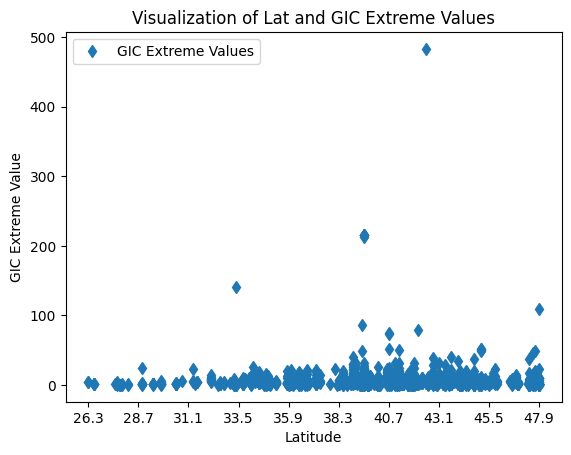

In [ ]:
# Visualize the distribution of GIC and laptitude
years = range(2013, 2013 + len(gic_values))
latitude_ticks = np.linspace(df[' Lat'].min(), df[' Lat'].max(), num=10)

plt.plot(df[' Lat'], gic_values, 'd', label='GIC Extreme Values')

plt.xlabel('Latitude')
plt.ylabel('GIC Extreme Value')
plt.title('Visualization of Lat and GIC Extreme Values')
plt.xticks(latitude_ticks)
plt.legend()

plt.show()

# Fitting data into GEV model

In [ ]:
# gic_value
df = pd.read_csv('/content/Final_NERC.csv')
gic_values = df['GIC_extreme_value'].values

# Data for each event
data = {
    'Event': [20130531, 20131002, 20150317, 20150622, 20150911, 20150919, 20151006, 20151220, 20170527, 20170907, 20170927, 20180825, 20210512, 20211103, 20220409],
    'GIC_extreme_value': [31.3, 40.5, 49.7, 216.0, 215.0, 215.0, 215.0, 213.0, 23.0, 30.5, 45.32, 483.0, 78.26, 108.8, 37.7]
}
event_gic_values = pd.DataFrame(data)
event_gic_values = event_gic_values['GIC_extreme_value']
# high_gic_value, over 100
high_gic_values_df = df[df['GIC_extreme_value'] > 100]
high_gic_values = df[df['GIC_extreme_value'] > 15].values

values_type = [gic_values, event_gic_values, high_gic_values]

return value of 1-100 yeas：50.56305909826591


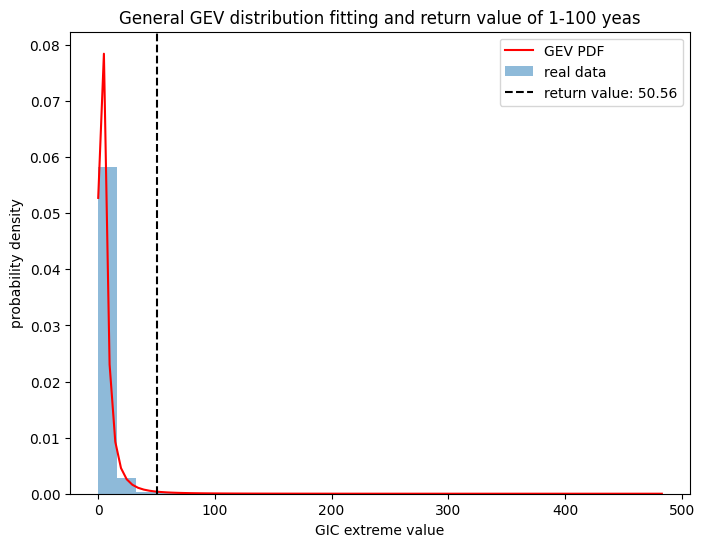

In [ ]:
# loading in gic_value
df = pd.read_csv('/content/Final_NERC.csv')
gic_values = df['GIC_extreme_value'].values
# Fit the Generalized Extreme Value (GEV) distribution to the GIC extreme value data
c, loc, scale = genextreme.fit(gic_values)

T = 100 # T = 100 years
# Calculate the return level of 1-100 years
# This return level is the value expected to be exceeded with a probability of 1/T in any given year
return_level_100y = genextreme.ppf(1 - 1/T, c, loc=loc, scale=scale)
general_return_level_100y = return_level_100y
print(f"return value of 1-100 yeas：{return_level_100y}")

# Visualization
x = np.linspace(min(gic_values), max(gic_values), 100)
# Calculate the PDF of the GEV distribution for the generated range of values using the fitted parameters
# PDF = Probability Density Function
pdf = genextreme.pdf(x, c, loc=loc, scale=scale)
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, 'r-', label='GEV PDF')
plt.hist(gic_values, density=True, alpha=0.5, bins=30, label='real data')
plt.axvline(return_level_100y, color='k', linestyle='--', label=f'return value: {return_level_100y:.2f}')
plt.xlabel('GIC extreme value')
plt.ylabel('probability density')
plt.title('General GEV distribution fitting and return value of 1-100 yeas')
plt.legend()
plt.show()

The GIC by event once in 100 years is：5098.624001790581


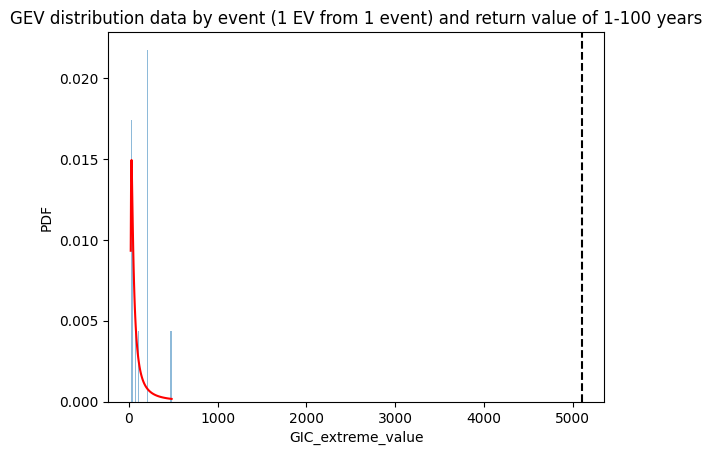

In [ ]:
data = {
    'Event': [20130531, 20131002, 20150317, 20150622, 20150911, 20150919, 20151006, 20151220, 20170527, 20170907, 20170927, 20180825, 20210512, 20211103, 20220409],
    'GIC_extreme_value': [31.3, 40.5, 49.7, 216.0, 215.0, 215.0, 215.0, 213.0, 23.0, 30.5, 45.32, 483.0, 78.26, 108.8, 37.7]
}
event_gic_values = pd.DataFrame(data)
# Fitting GEV model
gic_values = event_gic_values['GIC_extreme_value']
c, loc, scale = genextreme.fit(gic_values)
T = 100
# Calculate 100 years return level
return_level_100y = genextreme.ppf(1 - 1/T, c, loc=loc, scale=scale)
byevent_return_level_100y = return_level_100y

print(f"The GIC by event once in 100 years is：{return_level_100y}") # Print the estimated 100-year return level of GIC.


# # plotting the result
# x = np.linspace(min(gic_values), max(gic_values), 100) # Generate a range of values from the minimum to the maximum of the GIC data for plotting the GEV probability density function (PDF).
# pdf = genextreme.pdf(x, c, loc=loc, scale=scale)
# plt.plot(x, pdf, 'r-', label='GEV PDF')
# plt.axvline(return_level_100y, color='k', linestyle='--', label=f'return value: {return_level_100y:.2f}')
# plt.xlabel('GIC_extreme_value')
# plt.ylabel('PDF')
# plt.hist(gic_values, density=True, alpha=0.5, bins=30, label='GIC Data')
# plt.title('GEV distribution data by event (1 EV from 1 event) and return value of 1-100 years')
# plt.show()

# Return 1-100 years

In [ ]:
threshold_value = []
return_level = []
num_of_data = []
for i in np.arange(10,50, 1):
    # Setting Threshold for GEV model
    high_gic_values_df = df[df['GIC_extreme_value'] > i]
    high_gic_values = high_gic_values_df['GIC_extreme_value'].values
    gic_values = high_gic_values

    print('threshold = ', i)
    print('number of data = ', len(gic_values))
    # Fitting GEV distribution
    c, loc, scale = genextreme.fit(gic_values)
    T = 100
    # Calculate 100 years return level
    return_level_100y = genextreme.ppf(1 - 1/T, c, loc=loc, scale=scale)
    over15amp_return_level_100y = return_level_100y
    print(f"return value of 1-100 yeas：{return_level_100y}")
    print('------------------------------------------------')

    threshold_value.append(i)
    return_level.append(return_level_100y)
    num_of_data.append(len(gic_values))


threshold =  10
number of data =  268
return value of 1-100 yeas：282.445151464552
------------------------------------------------
threshold =  11
number of data =  224
return value of 1-100 yeas：299.01662147158765
------------------------------------------------
threshold =  12
number of data =  197
return value of 1-100 yeas：400.92365611276995
------------------------------------------------
threshold =  13
number of data =  170
return value of 1-100 yeas：461.7479955024175
------------------------------------------------
threshold =  14
number of data =  144
return value of 1-100 yeas：520.6399603772372
------------------------------------------------
threshold =  15
number of data =  130
return value of 1-100 yeas：700.7256759141997
------------------------------------------------
threshold =  16
number of data =  114
return value of 1-100 yeas：873.8401256416596
------------------------------------------------
threshold =  17
number of data =  100
return value of 1-100 yeas：967.102829

In [ ]:
import pandas as pd

# Define your lists to collect data
threshold_value = []
return_level = []
num_of_data = []

# Assuming df is your dataframe with the 'GIC_extreme_value' column
for i in np.arange(10, 50, 1):
    high_gic_values_df = df[df['GIC_extreme_value'] > i]
    high_gic_values = high_gic_values_df['GIC_extreme_value'].values

    threshold_value.append(i)
    num_of_data.append(len(high_gic_values))

    # If there are no data points above the threshold, we cannot fit a GEV model
    if len(high_gic_values) > 0:
        # Fit the GEV distribution
        c, loc, scale = genextreme.fit(high_gic_values)
        T = 100
        # Calculate the 100-year return level
        return_level_100y = genextreme.ppf(1 - 1/T, c, loc=loc, scale=scale)
        return_level.append(return_level_100y)
    else:
        return_level.append(np.nan)

# Create a DataFrame from the lists
gev_data = pd.DataFrame({
    'Threshold': threshold_value,
    'Return Level': return_level,
    'Number of Data': num_of_data
})

# Save the DataFrame to a CSV file
gev_data.to_csv('/content/gev_analysis.csv', index=False)

# Display the head of the DataFrame to confirm
gev_data.head()


,Threshold,Return Level,Number of Data
0,10,282.445151,268
1,11,299.016621,224
2,12,400.923656,197
3,13,461.747996,170
4,14,520.639960,144


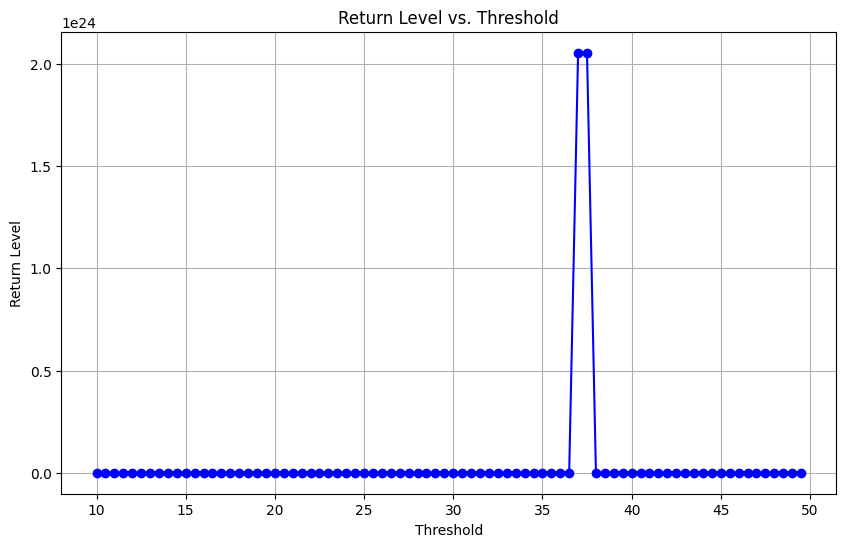

In [ ]:
df = pd.read_csv('/content/gev_analysis.csv')


# Convert lists to arrays if they aren't already for better handling in matplotlib
threshold_value = df['Threshold'].values
return_level = df['Return Level'].values
num_of_data = df['Number of Data'].values

# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(threshold_value, return_level, marker='o', linestyle='-', color='b')  # Line plot
plt.title('Return Level vs. Threshold')  # Title of the plot
plt.xlabel('Threshold')  # Label for the x-axis
plt.ylabel('Return Level')  # Label for the y-axis
plt.grid(True)  # Enable grid for better readability
plt.show()  # Display the plot


In [ ]:
# filter the rows that GIC_extreme_value over 50
filtered_df = df[df['GIC_extreme_value'] > 15]
filtered_df

,GICDeviceID,SampleDateTime,GIC_extreme_value,Event,Year,Lat,Long,Unnamed: 7,Unnamed: 8
0,10562,6/1/2013 2:28:24 AM,25.00,20130531,2013,40.7,-81.4,NaN,483.0
15,10181,5/31/2013 3:40:26 PM,31.30,20130531,2013,41.9,-74.0,NaN,NaN
17,10258,5/31/2013 10:15:30 PM,16.60,20130531,2013,47.4,-101.2,NaN,NaN
43,10385,6/1/2013 11:42:30 AM,23.90,20130531,2013,41.2,-73.8,NaN,NaN
47,10397,6/1/2013 12:45:50 AM,23.40,20130531,2013,39.1,-78.3,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1750,10112,11/4/2021 3:17:00 AM,20.05,20211103,2021,47.7,-117.4,NaN,NaN
1781,10184,4/10/2022 12:38:54 PM,21.70,20220409,2022,39.0,-78.2,NaN,NaN
1797,10116,4/9/2022 1:01:20 AM,22.28,20220409,2022,47.9,-121.9,NaN,NaN
1800,10306,4/9/2022 12:00:00 AM,37.70,20220409,2022,44.8,-88.2,NaN,NaN


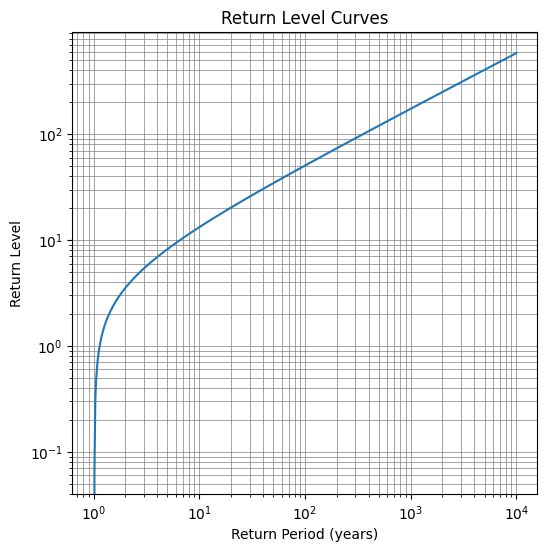

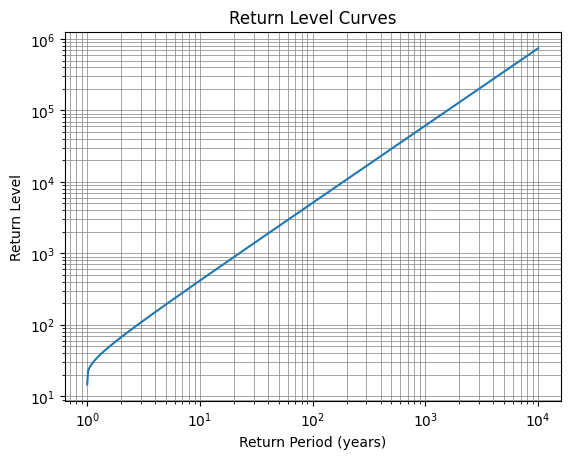

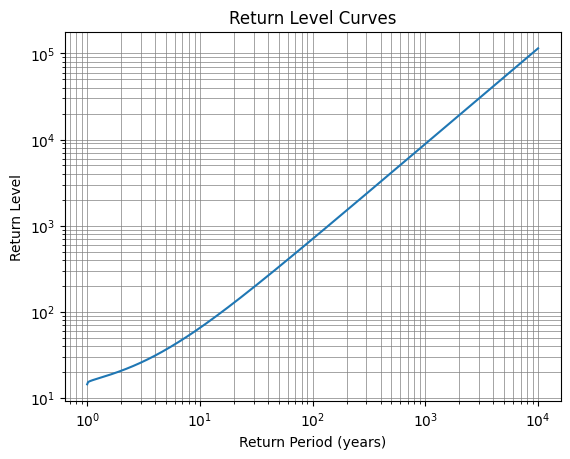

In [ ]:
high_gic_values_df = df[df['GIC_extreme_value'] > 15]
high_gic_values = high_gic_values_df['GIC_extreme_value'].values

values_type = [gic_values, event_gic_values, high_gic_values]

plt.figure(figsize=(6, 6))
for value_type in values_type:
    c, loc, scale = genextreme.fit(value_type)
    # Return periods to evaluate (1 to 10,000 years)
    return_periods = np.logspace(0, 4, 500)  # Generates 500 points between 10^0 and 10^4

    # Calculate the return levels for the return periods
    return_levels = genextreme.ppf(1 - 1/return_periods, c, loc, scale)



    plt.loglog(return_periods, return_levels)

    plt.xlabel('Return Period (years)')
    plt.ylabel('Return Level')
    plt.grid(which='both', linestyle='-', linewidth='0.5', color='gray')
    plt.title('Return Level Curves')
    plt.show()

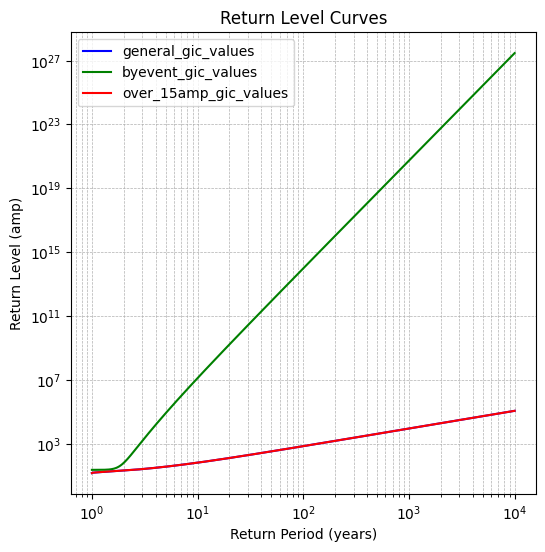

In [ ]:
# Create an empty plot with specified figure size
plt.figure(figsize=(6, 6))

# List of colors for the plot lines
colors = ['blue', 'green', 'red']
values = ['general_gic_values', 'byevent_gic_values', 'over_15amp_gic_values']
# Loop through each dataset, fit the GEV model, and plot the return level curve
for idx, value_type in enumerate([gic_values, event_gic_values, high_gic_values]):
    c, loc, scale = genextreme.fit(value_type)  # Fit the GEV model
    return_periods = np.logspace(0, 4, 500)  # Return periods from 1 to 10,000 years
    return_levels = genextreme.ppf(1 - 1/return_periods, c, loc, scale)  # Calculate return levels
    plt.loglog(return_periods, return_levels, label=values[idx], color=colors[idx])

# Labeling the plot
plt.xlabel('Return Period (years)')
plt.ylabel('Return Level (amp)')
plt.title('Return Level Curves')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()


# Return 1-10 years

In [ ]:
threshold_value = []
return_level = []
num_of_data = []
df = pd.read_csv('/content/Final_NERC.csv')
for i in np.arange(0,50, 1):
    # Setting Threshold for GEV model
    high_gic_values_df = df[df['GIC_extreme_value'] > i]
    high_gic_values = high_gic_values_df['GIC_extreme_value'].values
    gic_values = high_gic_values

    print('threshold = ', i)
    print('number of data = ', len(gic_values))
    # Fitting GEV
    c, loc, scale = genextreme.fit(gic_values)
    T = 10
    # calculate 10 years return level
    return_level_10y = genextreme.ppf(1 - 1/T, c, loc=loc, scale=scale)
    over15amp_return_level_10y = return_level_10y
    print(f"return value of 1-10 yeas：{return_level_10y}")
    print(f"Shape: {c}, Location: {loc}, Scale: {scale}")
    print('------------------------------------------------')

    threshold_value.append(i)
    return_level.append(return_level_100y)
    num_of_data.append(len(gic_values))


threshold =  0
number of data =  1798
return value of 1-10 yeas：13.534950006966785
Shape: -0.5584545981686844, Location: 2.6639725413617423, Scale: 2.414946915106591
------------------------------------------------
threshold =  1
number of data =  1595
return value of 1-10 yeas：14.8418717389243
Shape: -0.6471099456587043, Location: 3.179828520136388, Scale: 2.2939612379342744
------------------------------------------------
threshold =  2
number of data =  1286
return value of 1-10 yeas：16.39163349227296
Shape: -0.6570958447014087, Location: 4.255245379986551, Scale: 2.354336000868699
------------------------------------------------
threshold =  3
number of data =  1061
return value of 1-10 yeas：18.18012482743558
Shape: -0.7042135312537511, Location: 5.1843266793727985, Scale: 2.359920810476872
------------------------------------------------
threshold =  4
number of data =  864
return value of 1-10 yeas：20.482378650381193
Shape: -0.766600272917404, Location: 6.168632769613817, Scale: 

In [ ]:
import numpy as np
from scipy.stats import genextreme
import pandas as pd

# Assuming df is already loaded
df = pd.read_csv('/content/Final_NERC.csv')

# Lists to store the results
threshold_value = []
return_level = []
num_of_data = []
shape_params = []
loc_params = []
scale_params = []

for i in np.arange(0, 50, 1):
    high_gic_values_df = df[df['GIC_extreme_value'] > i]
    gic_values = high_gic_values_df['GIC_extreme_value'].values

    if len(gic_values) > 0:  # Ensuring enough data points for fitting
        c, loc, scale = genextreme.fit(gic_values)
        T = 10  # Return period
        return_level_10y = genextreme.ppf(1 - 1/T, c, loc, scale)

        # Store each computation in lists
        threshold_value.append(i)
        return_level.append(return_level_10y)
        num_of_data.append(len(gic_values))
        shape_params.append(c)
        loc_params.append(loc)
        scale_params.append(scale)
    else:
        # Append NaN or some indicator for insufficient data
        threshold_value.append(i)
        return_level.append(np.nan)
        num_of_data.append(len(gic_values))
        shape_params.append(np.nan)
        loc_params.append(np.nan)
        scale_params.append(np.nan)

# Create a DataFrame from the collected data
results_df = pd.DataFrame({
    'Threshold': threshold_value,
    'Return Level': return_level,
    'Number of Data': num_of_data,
    'Shape': shape_params,
    'Loc': loc_params,
    'Scale': scale_params
})

# Save the DataFrame to a CSV file
results_df.to_csv('/content/gev_analysis_results.csv', index=False)

print("Data saved to '/content/gev_analysis_results.csv'.")
results_df.head(50)

Data saved to '/content/gev_analysis_results.csv'.


,Threshold,Return Level,Number of Data,Shape,Loc,Scale
0,0,1.353495e+01,1798,-0.558455,2.663973,2.414947
1,1,1.484187e+01,1595,-0.647110,3.179829,2.293961
2,2,1.639163e+01,1286,-0.657096,4.255245,2.354336
3,3,1.818012e+01,1061,-0.704214,5.184327,2.359921
4,4,2.048238e+01,864,-0.766600,6.168633,2.378560
5,5,2.266256e+01,700,-0.771127,7.264604,2.542166
6,6,2.476240e+01,571,-0.772018,8.407506,2.696703
7,7,2.737652e+01,477,-0.837933,9.387003,2.696272
8,8,3.058218e+01,397,-0.888517,10.389681,2.809802
9,9,3.631375e+01,338,-1.054466,11.143214,2.728120


In [ ]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('/content/Final_NERC.csv')

# Extract the 'GIC_extreme_value' column values
gic_values = df['GIC_extreme_value'].values

# Filter values where GIC extreme value is greater than 30
over30_amp = gic_values[gic_values > 30]
over30_amp = np.sort(over30_amp)
# Print the filtered values

over30_amp


array([ 30.5 ,  30.8 ,  31.1 ,  31.3 ,  31.5 ,  31.8 ,  32.3 ,  34.6 ,
        36.83,  37.7 ,  38.8 ,  40.5 ,  40.76,  45.32,  48.6 ,  48.7 ,
        49.4 ,  49.66,  49.7 ,  51.26,  51.91,  52.  ,  73.  ,  75.  ,
        78.26,  86.7 , 108.8 , 140.8 , 213.  , 215.  , 215.  , 215.  ,
       216.  , 483.  ])

# Sample 80%

randomly sample 80% of GIC EV and estimate 1-100 years return value
Trial 1: Return Level = 643.1872069610472, Number of Data Points = 102
Trial 2: Return Level = 789.8412496312267, Number of Data Points = 105
Trial 3: Return Level = 559.7401226510744, Number of Data Points = 94
Trial 4: Return Level = 512.013155241924, Number of Data Points = 106
Trial 5: Return Level = 684.5507594230729, Number of Data Points = 101
Trial 6: Return Level = 743.789916094491, Number of Data Points = 99
Trial 7: Return Level = 490.4392302869346, Number of Data Points = 104


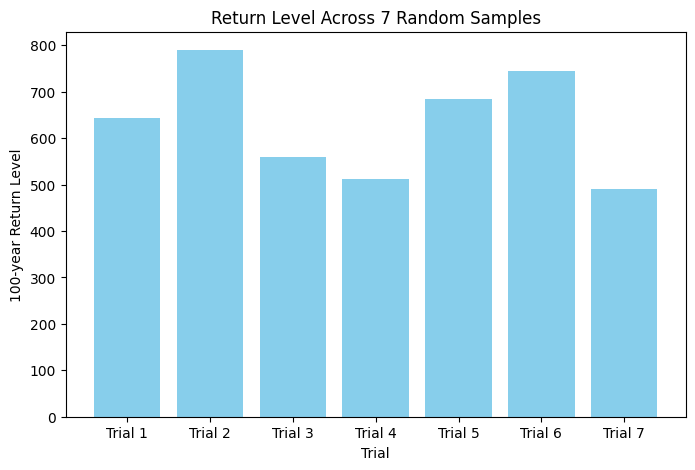

In [ ]:
df = pd.read_csv('/content/Final_NERC.csv')
# gic_values = df['GIC_extreme_value'].values
def sample_and_fit(dataframe, sample_fraction, threshold):
    # Sample 80% of the data randomly
    sample_df = dataframe.sample(frac=sample_fraction, random_state=np.random.randint(0, 1000))

    # Filter the data above the threshold
    filtered_data = sample_df[sample_df['GIC_extreme_value'] > threshold]['GIC_extreme_value']

    # Fit the GEV distribution
    c, loc, scale = genextreme.fit(filtered_data)

    # Calculate the 100-year return level
    return_level_100y = genextreme.ppf(1 - 1/100, c, loc=loc, scale=scale)

    return return_level_100y, len(filtered_data)
print('randomly sample 80% of GIC EV and estimate 1-100 years return value')
# Perform the operation three times
results = []
for _ in range(7):
    result = sample_and_fit(df, 0.8, 15)
    results.append(result)

# Print results
for idx, (return_level, count) in enumerate(results):
    print(f"Trial {idx+1}: Return Level = {return_level}, Number of Data Points = {count}")

# Optional: Visualizing the return levels from each trial
plt.figure(figsize=(8, 5))
plt.bar(range(1, 8), [res[0] for res in results], color='skyblue')
plt.xlabel('Trial')
plt.ylabel('100-year Return Level')
plt.title('Return Level Across 7 Random Samples')
plt.xticks(range(1, 8), ['Trial 1', 'Trial 2', 'Trial 3', 'Trial 4', 'Trial 5', 'Trial 6', 'Trial 7'])
plt.show()

Maximum Return Level: 23583.287485702527
Minimum Return Level: 323.0174322765944
25th Percentile: 615.9186672442305
50th Percentile (Median): 728.0704571007057
75th Percentile: 849.3213020456687


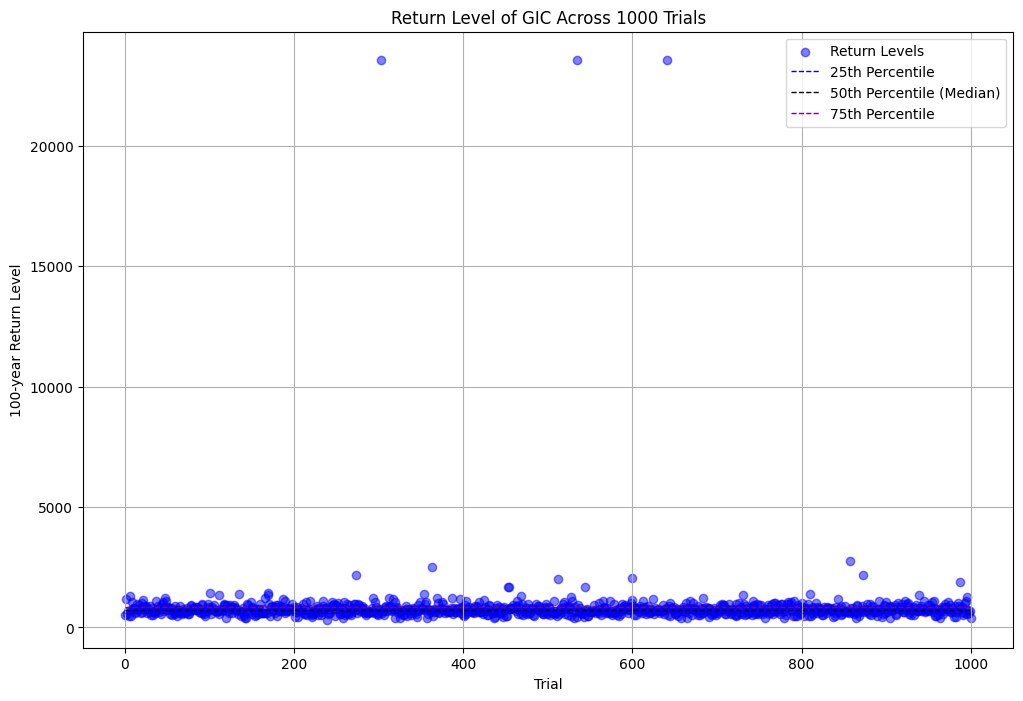

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import genextreme
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Final_NERC.csv')

def sample_and_fit(dataframe, sample_fraction, threshold):
    sample_df = dataframe.sample(frac=sample_fraction, random_state=np.random.randint(0, 1000))
    filtered_data = sample_df[sample_df['GIC_extreme_value'] > threshold]['GIC_extreme_value']
    if len(filtered_data) > 0:
        c, loc, scale = genextreme.fit(filtered_data)
        return_level_100y = genextreme.ppf(1 - 1/100, c, loc, scale)
        return return_level_100y, len(filtered_data)
    else:
        return np.nan, 0  # Return NaN if no data above threshold

# Performing 1000 trials
results = [sample_and_fit(df, 0.8, 15) for _ in range(1000)]

# Extracting return levels and filtering out NaN values
return_levels = [result[0] for result in results if not np.isnan(result[0])]

# Computing statistics
max_return_level = max(return_levels)
min_return_level = min(return_levels)
percentiles = np.percentile(return_levels, [25, 50, 75])  # 25%, 50%, 75% percentiles

print(f"Maximum Return Level: {max_return_level}")
print(f"Minimum Return Level: {min_return_level}")
print(f"25th Percentile: {percentiles[0]}")
print(f"50th Percentile (Median): {percentiles[1]}")
print(f"75th Percentile: {percentiles[2]}")

# Visualizing the distribution of return levels
plt.figure(figsize=(12, 8))
plt.scatter(range(1, 1001), return_levels, color='blue', alpha=0.5, label='Return Levels')
plt.hlines(percentiles[0], xmin=1, xmax=1000, colors='blue', linestyles='dashed', linewidth=1, label='25th Percentile')
plt.hlines(percentiles[1], xmin=1, xmax=1000, colors='black', linestyles='dashed', linewidth=1, label='50th Percentile (Median)')
plt.hlines(percentiles[2], xmin=1, xmax=1000, colors='purple', linestyles='dashed', linewidth=1, label='75th Percentile')
plt.title('Return Level of GIC Across 1000 Trials')
plt.xlabel('Trial')
plt.ylabel('100-year Return Level')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import genextreme
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Final_NERC.csv')


def sample_and_fit(dataframe, sample_fraction, threshold):
    sample_df = dataframe.sample(frac=sample_fraction, random_state=np.random.randint(0, 1000))
    filtered_data = sample_df[sample_df['GIC_extreme_value'] > threshold]['GIC_extreme_value']
    if len(filtered_data) > 0:
        c, loc, scale = genextreme.fit(filtered_data)
        return_level_10y = genextreme.ppf(1 - 1/10, c, loc, scale)
        return return_level_10y, len(filtered_data)
    else:
        return np.nan, 0  # Return NaN if no data above threshold

for i in range(5):
    # Performing 1000 trials
    results = [sample_and_fit(df, 0.8, 44) for _ in range(1000)]

    # Extracting return levels and filtering out NaN values
    return_levels = [result[0] for result in results if not np.isnan(result[0])]

    # Computing statistics
    max_return_level = max(return_levels)
    min_return_level = min(return_levels)
    percentiles = np.percentile(return_levels, [25, 50, 75])  # 25%, 50%, 75% percentiles
    print(f'Trial: {i}')
    print(f"Maximum Return Level: {max_return_level}")
    print(f"Minimum Return Level: {min_return_level}")
    print(f"25th Percentile: {percentiles[0]}")
    print(f"50th Percentile (Median): {percentiles[1]}")
    print(f"75th Percentile: {percentiles[2]}")

    # # Visualizing the distribution of return levels
    # plt.figure(figsize=(12, 8))
    # plt.scatter(range(1, 1001), return_levels, color='blue', alpha=0.5, label='Return Levels')
    # plt.hlines(percentiles[0], xmin=1, xmax=1000, colors='blue', linestyles='dashed', linewidth=1, label='25th Percentile')
    # plt.hlines(percentiles[1], xmin=1, xmax=1000, colors='black', linestyles='dashed', linewidth=1, label='50th Percentile (Median)')
    # plt.hlines(percentiles[2], xmin=1, xmax=1000, colors='purple', linestyles='dashed', linewidth=1, label='75th Percentile')
    # plt.title('Return Level of GIC Across 1000 Trials')
    # plt.xlabel('Trial')
    # plt.ylabel('10-year Return Level')
    # plt.legend()
    # plt.grid(True)
    # plt.show()


Trial: 0
Maximum Return Level: 5318.479661907351
Minimum Return Level: 139.84887246860893
25th Percentile: 319.6392589467457
50th Percentile (Median): 391.71267512770544
75th Percentile: 527.0994931754842
Trial: 1
Maximum Return Level: 353574158.27365625
Minimum Return Level: 137.88637703867283
25th Percentile: 321.34438939790414
50th Percentile (Median): 389.663831731666
75th Percentile: 524.8252940191508
Trial: 2
Maximum Return Level: 42797489.71455162
Minimum Return Level: 137.88637703867283
25th Percentile: 316.19776816722805
50th Percentile (Median): 389.12037023247774
75th Percentile: 527.128124800774
Trial: 3
Maximum Return Level: 45232950.50548245
Minimum Return Level: 137.88637703867283
25th Percentile: 321.7113778943464
50th Percentile (Median): 387.66993102303604
75th Percentile: 510.9282249644345
Trial: 4
Maximum Return Level: 825336781.8807156
Minimum Return Level: 170.37595326890582
25th Percentile: 327.8493565499544
50th Percentile (Median): 402.1088977432072
75th Percen